# Context
Phase three of this project is data cleanup and dimensionality reduction.\
This notebook drives this process for the data that went through the
transformations in PH2.

In [1]:
# Set project's environment variables
import os
import sys
from dotenv import load_dotenv
load_dotenv(dotenv_path="../project.env")
sys.path.append(os.environ["PYTHONPATH"])

import pickle

In [2]:
# Import project-wide and PH2 specific variables and functions
import superheader as sup
import PH3header as ph3



Chosen class grouping: alpha-classes


Directory /Users/diego/Desktop/iteso/TOG/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/src exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/scores exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH1/alpha-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH2/alpha-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes exists. Continuing with execution


In [3]:
PH3_IS_W2 = True

if PH3_IS_W2:
  prePH3_ROOT = sup.PH2_DATA_ROOT
  PH3_SUB_DATA_ROOT = os.path.join(sup.PH3_DATA_ROOT, sup.PH3_W2_CODE)
  PH3_SUB_BINGEN_ROOT = os.path.join(sup.PH3_BINGEN_ROOT, sup.PH3_W2_CODE)
  PH3_SUB_MEDIAGEN_ROOT = os.path.join(sup.PH3_MEDIAGEN_ROOT, sup.PH3_W2_CODE)
else:
  prePH3_ROOT = sup.PH1_DATA_ROOT
  PH3_SUB_DATA_ROOT = os.path.join(sup.PH3_DATA_ROOT, sup.PH3_WO2_CODE)
  PH3_SUB_BINGEN_ROOT = os.path.join(sup.PH3_BINGEN_ROOT, sup.PH3_WO2_CODE)
  PH3_SUB_MEDIAGEN_ROOT = os.path.join(sup.PH3_MEDIAGEN_ROOT, sup.PH3_WO2_CODE)

sup.report_dir_if_not_exists(prePH3_ROOT)
sup.create_dir_if_not_exists(PH3_SUB_DATA_ROOT)
sup.create_dir_if_not_exists(PH3_SUB_BINGEN_ROOT)
sup.create_dir_if_not_exists(PH3_SUB_MEDIAGEN_ROOT)

Directory /Users/diego/Desktop/iteso/TOG/data/PH2/alpha-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/w2 exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/w2 exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/w2 exists. Continuing with execution


# Source dataframe loading

In [4]:
import pandas as pd

## Active hand detection

In [5]:
prePH3_ah_frame_df = pd.read_csv(os.path.join(prePH3_ROOT, f"{sup.DATA_AH_PF}.csv"))
prePH3_ah_frame_df

,fileid,person_id,cycle_num,handedness,class_name,class_numeric,current_frame,active_hand,h_v1x,h_v1y,...,wh18z,wh19x,wh19y,wh19z,wh20x,wh20y,wh20z,cp_h_mean_x,cp_h_mean_y,cp_h_mean_z
0,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,0,1,0.057899,-0.998047,...,1.370475,-1.845207,-0.126410,1.388787,-1.793037,-0.122584,1.415105,-2.629674,0.795690,-0.076412
1,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,0,0,-0.193123,0.967382,...,2.925472,2.483835,1.005685,2.889273,2.556190,1.023228,2.897902,-3.529724,0.956991,0.256039
2,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,1,1,0.101697,-0.994756,...,1.411701,-1.857026,-0.194359,1.428379,-1.808238,-0.188388,1.455144,-2.591543,0.966486,-0.216816
3,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,1,0,-0.197447,0.966163,...,2.968985,2.503209,1.034866,2.932061,2.575259,1.052822,2.940708,-3.498660,1.182494,0.065678
4,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,2,1,0.107233,-0.993941,...,1.324809,-1.783978,-0.213796,1.341799,-1.733032,-0.207673,1.368740,-2.709700,0.834027,-0.100787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69567,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,9,1,-0.246658,-0.945336,...,1.518278,1.543923,-0.745791,1.535597,1.635684,-0.770878,1.537495,-1.505613,1.061272,-0.031634
69568,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,10,1,-0.122481,-0.972688,...,1.413643,1.462179,-0.480662,1.414897,1.547520,-0.487985,1.418145,-1.399091,1.097829,-0.072567
69569,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,10,0,0.463611,0.289227,...,0.512181,-0.081858,1.666662,0.520316,-0.115102,1.715198,0.515583,-2.749760,1.409419,-0.133295
69570,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,11,1,0.099678,-0.982737,...,2.012829,1.744368,-0.157489,1.995327,1.734795,-0.159833,2.016875,-1.365585,1.082710,-0.014325


# Cleanup

## Identify numeric columns which will go through standardization and dimensionality reduction

In [6]:
if PH3_IS_W2:
  ah_pf_dataCols = sup.pf_wrist_hand_landmark_columns+sup.pf_chest_pose_landmark_columns+sup.pf_h_v123_columns
else:
  ah_pf_dataCols = sup.pf_hand_landmark_columns+sup.pf_pose_landmark_columns

## Standardize data

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
ah_pf_scaler = StandardScaler()

PH3_AH_FRM_std_df = prePH3_ah_frame_df[sup.tag_columns+sup.class_columns+[sup.current_frame_col]]
PH3_AH_FRM_std_df[ah_pf_dataCols] = ah_pf_scaler.fit_transform(prePH3_ah_frame_df[ah_pf_dataCols])

PH3_AH_FRM_std_df

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_31121/683750519.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH3_AH_FRM_std_df[ah_pf_dataCols] = ah_pf_scaler.fit_transform(prePH3_ah_frame_df[ah_pf_dataCols])
/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_31121/683750519.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH3_AH_FRM_std_df[ah_pf_dataCols] = ah_pf_scaler.fit_transform(prePH3_ah_frame_df[ah_pf_dataCols])
/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_3

,fileid,person_id,cycle_num,handedness,class_name,class_numeric,active_hand,current_frame,wh0x,wh0y,...,cp_h_mean_z,h_v1x,h_v1y,h_v1z,h_v2x,h_v2y,h_v2z,h_v3x,h_v3y,h_v3z
0,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,1,0,-1.166287,-0.738113,...,-1.297095,0.125933,-1.060567,0.994043,-0.827477,-1.143084,1.015976,0.293113,0.408674,-0.253974
1,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,0,0,1.521400,0.602266,...,0.300338,-0.558242,1.263507,0.439209,0.384787,1.090637,0.787304,0.177867,0.092469,-0.433905
2,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,1,1,-1.180969,-0.813295,...,-1.971743,0.245306,-1.056675,1.043724,-0.662460,-1.155730,1.081149,0.280451,0.401794,-0.231462
3,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,0,1,1.532694,0.637437,...,-0.614352,-0.570027,1.262066,0.431222,0.355194,1.091842,0.780415,0.181938,0.094172,-0.418707
4,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,1,2,-1.134874,-0.835397,...,-1.414218,0.260395,-1.055711,0.991328,-0.684634,-1.152824,1.001401,0.302967,0.427141,-0.272434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69567,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,1,9,0.937112,-1.483946,...,-1.081936,-0.704155,-0.998237,0.244263,0.038349,-1.141941,0.316726,-0.065179,0.714496,-0.252526
69568,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,1,10,0.886021,-1.142068,...,-1.278620,-0.365702,-1.030579,0.307967,0.548889,-1.124665,0.380694,-0.119895,0.706800,-0.350969
69569,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,0,10,-0.161520,1.400356,...,-1.570420,1.231721,0.461604,-2.220671,-0.519566,0.799785,-1.652556,-1.999101,-1.909201,-0.595063
69570,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,1,11,1.019280,-0.733670,...,-0.998765,0.239803,-1.042463,0.471115,1.042656,-1.091939,0.684243,-0.021148,0.559356,-0.134438


## Save standardizers

In [9]:
with open(os.path.join(PH3_SUB_BINGEN_ROOT, f"scaler_{sup.DATA_AH_PF}.pkl"), 'wb') as f:
  pickle.dump(ah_pf_scaler, f)

# Dimensionality Reduction

## Helper functions

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.pipeline import make_pipeline
from sklearn.kernel_approximation import Nystroem
from sklearn.decomposition import PCA
import umap.umap_ as umap

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
def flatten_video(group):
  data_cols = [col for col in group.columns if col not in 
                sup.tag_columns + sup.class_columns + [sup.current_frame_col]]

  flattened_dict = {}

  frame_list = []
  for _, row in group.iterrows():
      frame_num = int(row[sup.current_frame_col])
      frame_list.append(frame_num)
      prefix = f"f{frame_num}_"
      for col in data_cols:
          flattened_dict[prefix + col] = row[col]

  if frame_list != [i for i in range(12)]:
     print("Big probelm 2")
     print(frame_list)
     print(group.iloc[0][sup.tag_columns])

  # Add the group keys (the tags)
  group_keys = group.iloc[0][sup.tag_columns + sup.class_columns].to_dict()
  group_keys.update(flattened_dict)
  return pd.DataFrame([group_keys])

In [12]:
def visualize(origin_df, data_cols, data_unit, label_col, reducer_name, kernel_name=""):    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    if label_col == sup.active_hand_col:
        filtered_df = origin_df
    else:
        spf_df = origin_df[origin_df[sup.active_hand_col] == 1]
        if data_unit == sup.DATA_S_PF:
            filtered_df = spf_df
        elif data_unit == sup.DATA_S_PV:
            filtered_df = spf_df\
                .groupby(sup.tag_columns+sup.class_columns)\
                .apply(flatten_video).reset_index(drop=True)

    labels_cat = filtered_df[label_col].astype('category')
    categories = labels_cat.cat.categories
    cat_to_idx = {cat: i for i, cat in enumerate(categories)}
    colors = labels_cat.map(cat_to_idx)
    cmap = plt.cm.Spectral

    if reducer_name == sup.PH3_REDUCER_NAME_PCA:
        reducer = PCA(n_components=3, random_state=42)
    elif reducer_name == sup.PH3_REDUCER_NAME_UMAP:
        reducer = umap.UMAP(n_components=3, random_state=42)
    elif reducer_name == sup.PH3_REDUCER_NAME_KPCA:
        nystroem = Nystroem(kernel=kernel_name, gamma=0.5, n_components=500)
        reducer = make_pipeline(nystroem, PCA(n_components=3, random_state=42))

    if data_unit == sup.DATA_S_PV:
        filtered_data = reducer.fit_transform(filtered_df.drop(columns=sup.tag_columns+sup.class_columns))
    else:
        data = reducer.fit_transform(origin_df.drop(columns=sup.tag_columns+sup.class_columns+[sup.current_frame_col]))
        if label_col == sup.active_hand_col:
            filtered_data = data
        else:
            filtered_data = data[origin_df[sup.active_hand_col] == 1]
    
    sc = ax.scatter(filtered_data[:, 0], filtered_data[:, 1], filtered_data[:, 2], c=colors, cmap=cmap, s=20)

    for cat, idx in cat_to_idx.items():
        ax.scatter([], [], [], color=cmap(idx / (len(categories) - 1)), label=cat)
    ax.legend(title=label_col)

    figtitle = f"{reducer_name}-{kernel_name}-{data_unit}"
    ax.set_title(figtitle)

    PH3_SUB3_MEDIAGEN_ROOT = os.path.join(PH3_SUB_MEDIAGEN_ROOT, reducer_name, kernel_name)
    sup.create_dir_if_not_exists(PH3_SUB3_MEDIAGEN_ROOT)
    figpath = os.path.join(PH3_SUB3_MEDIAGEN_ROOT, f"{figtitle}.png")
    plt.savefig(figpath, dpi=300, bbox_inches='tight')

    plt.show()

def writeout(origin_df, data_cols, label_cols, reducer_name, kernel_name=""):
    for n in sup.PH3_N_CANDIDATES:
        if reducer_name == sup.PH3_REDUCER_NAME_PCA:
            reducer = PCA(n_components=n, random_state=42)
        elif reducer_name == sup.PH3_REDUCER_NAME_UMAP:
            reducer = umap.UMAP(n_components=n, random_state=42)
        elif reducer_name == sup.PH3_REDUCER_NAME_KPCA:
            nystroem = Nystroem(kernel=kernel_name, gamma=0.5, n_components=500)
            reducer = make_pipeline(nystroem, PCA(n_components=n, random_state=42))

        data = reducer.fit_transform(origin_df[data_cols])

        reduced_df = pd.DataFrame(data)
        reduced_df[sup.tag_columns+label_cols+[sup.current_frame_col]] = origin_df[sup.tag_columns+label_cols+[sup.current_frame_col]]

        PH3_SUB3_DATA_ROOT = os.path.join(PH3_SUB_DATA_ROOT, reducer_name, kernel_name)
        sup.create_dir_if_not_exists(PH3_SUB3_DATA_ROOT)
        PH3_SUB3_BINGEN_ROOT = os.path.join(PH3_SUB_BINGEN_ROOT, reducer_name, kernel_name)
        sup.create_dir_if_not_exists(PH3_SUB3_BINGEN_ROOT)

        reduced_df.to_csv(os.path.join(PH3_SUB3_DATA_ROOT, f"{sup.DATA_AH_PF}_{n}.csv"), index=False)
        with open(os.path.join(PH3_SUB3_BINGEN_ROOT, f"{sup.DATA_AH_PF}{n}.pkl"), 'wb') as f:
            pickle.dump(reducer, f)

## PCA

In [13]:
PH3_AH_FRM_PCA_df = PH3_AH_FRM_std_df.copy()

### Active hand detection

#### Exploration

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/w2/pca/ exists. Continuing with execution


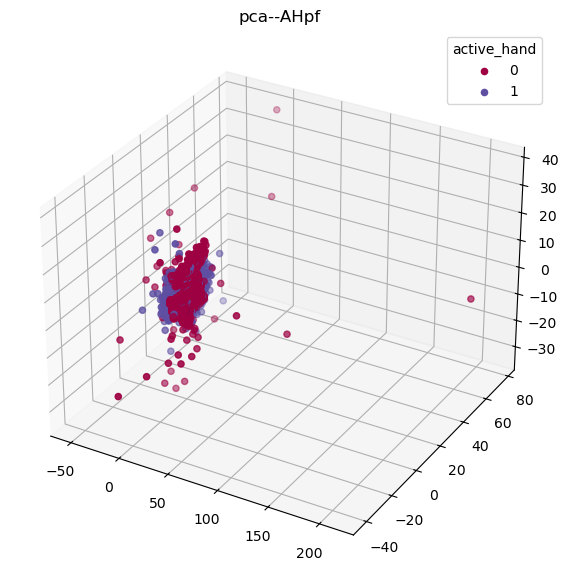

In [15]:
visualize(origin_df=PH3_AH_FRM_PCA_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_AH_PF, label_col=sup.active_hand_col, reducer_name=sup.PH3_REDUCER_NAME_PCA, kernel_name='')

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/w2/pca/ exists. Continuing with execution


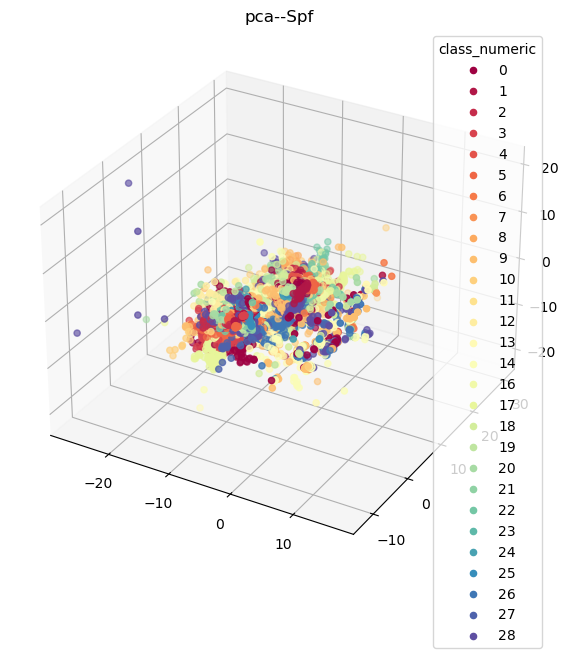

In [16]:
visualize(origin_df=PH3_AH_FRM_PCA_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_S_PF, label_col=sup.class_numeric_column, reducer_name=sup.PH3_REDUCER_NAME_PCA, kernel_name='')

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_31121/472059142.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flatten_video).reset_index(drop=True)


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/w2/pca/ exists. Continuing with execution


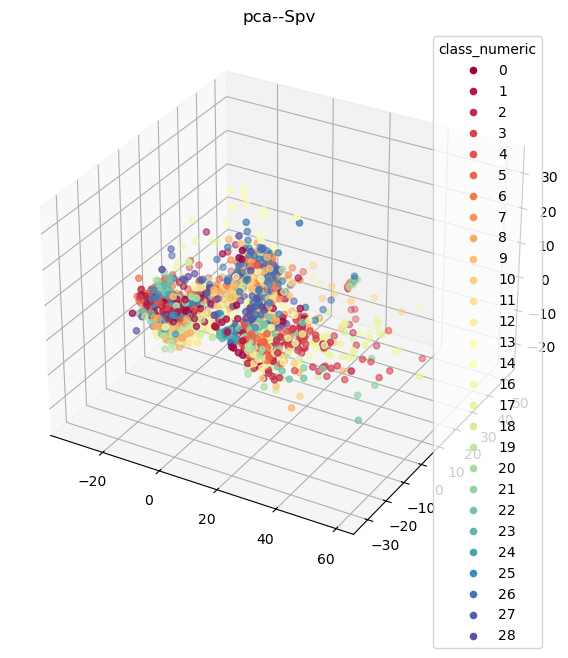

In [17]:
visualize(origin_df=PH3_AH_FRM_PCA_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_S_PV, label_col=sup.class_numeric_column, reducer_name=sup.PH3_REDUCER_NAME_PCA, kernel_name='')

#### Writeout

In [18]:
writeout(origin_df=PH3_AH_FRM_PCA_df, data_cols=ah_pf_dataCols, label_cols=sup.class_columns, reducer_name=sup.PH3_REDUCER_NAME_PCA, kernel_name='')

Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/w2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/w2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/w2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/w2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/w2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/w2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/w2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/w2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/w2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/ite

## Kernel PCA

In [19]:
PH3_AH_FRM_KPCA_df = PH3_AH_FRM_std_df.copy()

### Active hand detection

In [20]:
PH3_AH_FRM_KPCA_df

,fileid,person_id,cycle_num,handedness,class_name,class_numeric,active_hand,current_frame,wh0x,wh0y,...,cp_h_mean_z,h_v1x,h_v1y,h_v1z,h_v2x,h_v2y,h_v2z,h_v3x,h_v3y,h_v3z
0,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,1,0,-1.166287,-0.738113,...,-1.297095,0.125933,-1.060567,0.994043,-0.827477,-1.143084,1.015976,0.293113,0.408674,-0.253974
1,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,0,0,1.521400,0.602266,...,0.300338,-0.558242,1.263507,0.439209,0.384787,1.090637,0.787304,0.177867,0.092469,-0.433905
2,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,1,1,-1.180969,-0.813295,...,-1.971743,0.245306,-1.056675,1.043724,-0.662460,-1.155730,1.081149,0.280451,0.401794,-0.231462
3,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,0,1,1.532694,0.637437,...,-0.614352,-0.570027,1.262066,0.431222,0.355194,1.091842,0.780415,0.181938,0.094172,-0.418707
4,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,1,2,-1.134874,-0.835397,...,-1.414218,0.260395,-1.055711,0.991328,-0.684634,-1.152824,1.001401,0.302967,0.427141,-0.272434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69567,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,1,9,0.937112,-1.483946,...,-1.081936,-0.704155,-0.998237,0.244263,0.038349,-1.141941,0.316726,-0.065179,0.714496,-0.252526
69568,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,1,10,0.886021,-1.142068,...,-1.278620,-0.365702,-1.030579,0.307967,0.548889,-1.124665,0.380694,-0.119895,0.706800,-0.350969
69569,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,0,10,-0.161520,1.400356,...,-1.570420,1.231721,0.461604,-2.220671,-0.519566,0.799785,-1.652556,-1.999101,-1.909201,-0.595063
69570,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,1,11,1.019280,-0.733670,...,-0.998765,0.239803,-1.042463,0.471115,1.042656,-1.091939,0.684243,-0.021148,0.559356,-0.134438


#### Exploration

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/w2/kpca/poly exists. Continuing with execution


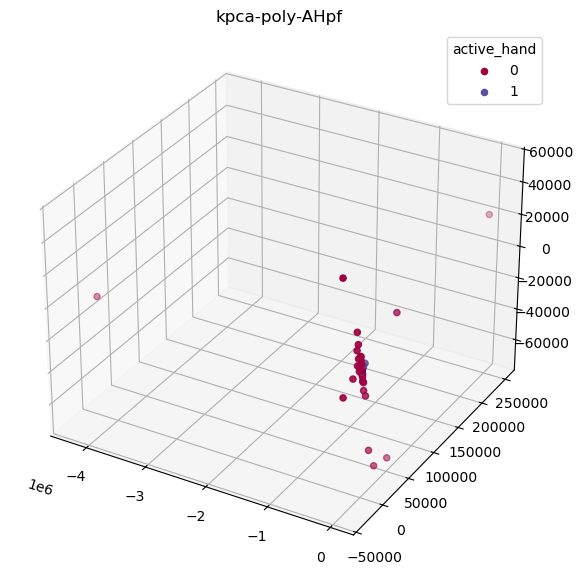

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/w2/kpca/rbf exists. Continuing with execution


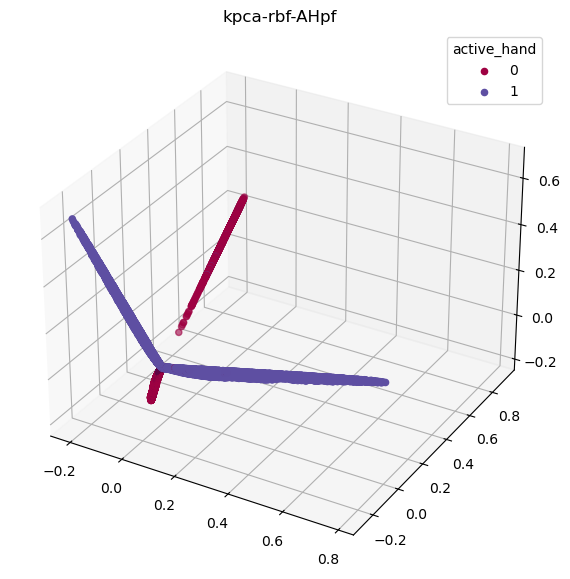

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/w2/kpca/sigmoid exists. Continuing with execution


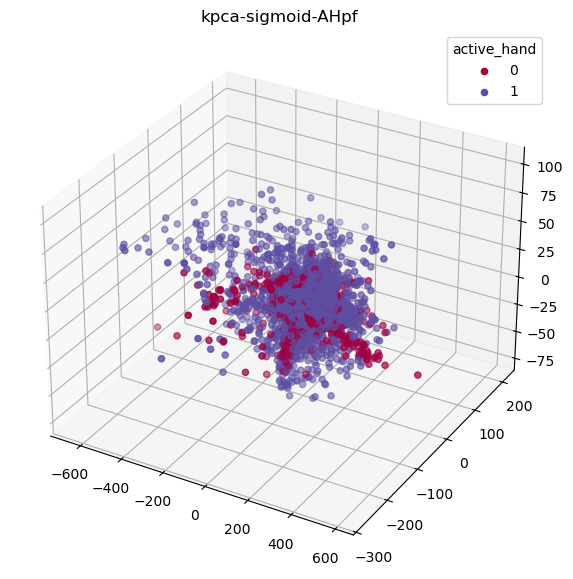

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/w2/kpca/cosine exists. Continuing with execution


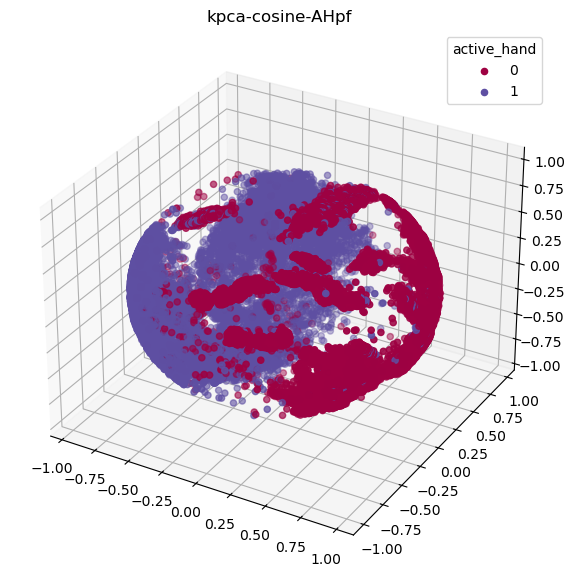

In [21]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  visualize(origin_df=PH3_AH_FRM_KPCA_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_AH_PF, label_col=sup.active_hand_col, reducer_name=sup.PH3_REDUCER_NAME_KPCA, kernel_name=kernel_name)

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/w2/kpca/poly exists. Continuing with execution


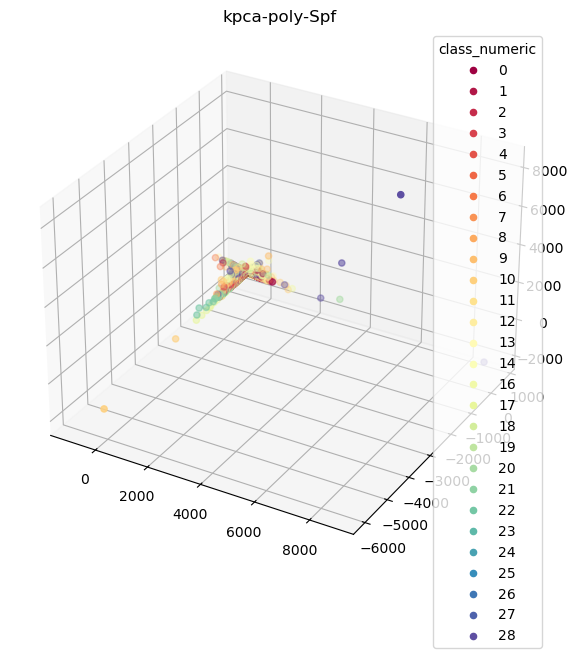

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/w2/kpca/rbf exists. Continuing with execution


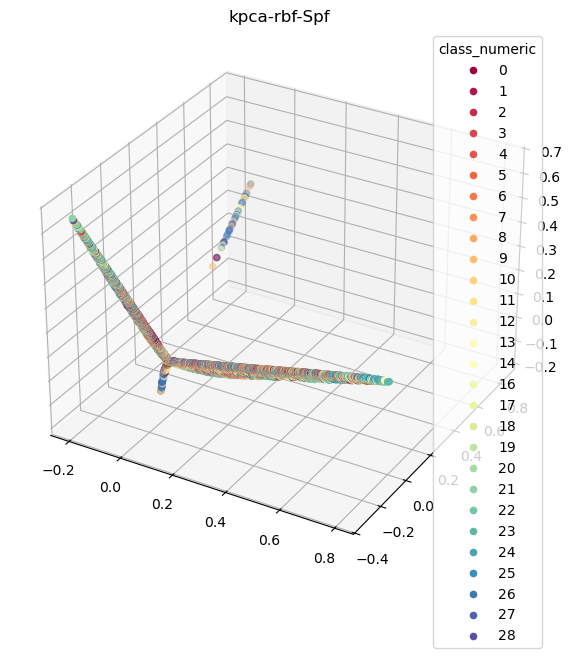

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/w2/kpca/sigmoid exists. Continuing with execution


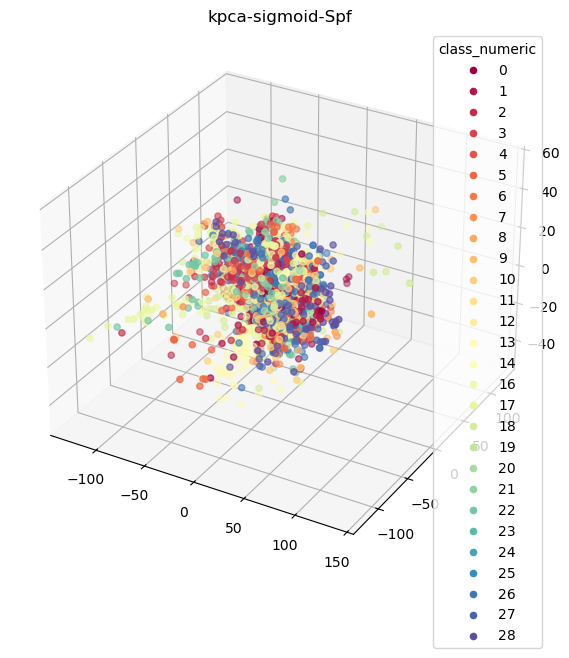

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/w2/kpca/cosine exists. Continuing with execution


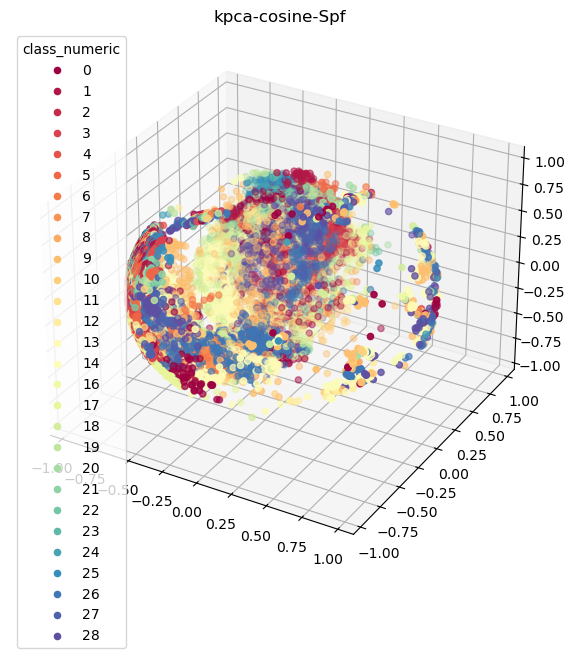

In [22]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  visualize(origin_df=PH3_AH_FRM_KPCA_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_S_PF, label_col=sup.class_numeric_column, reducer_name=sup.PH3_REDUCER_NAME_KPCA, kernel_name=kernel_name)

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_31121/472059142.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flatten_video).reset_index(drop=True)


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/w2/kpca/poly exists. Continuing with execution


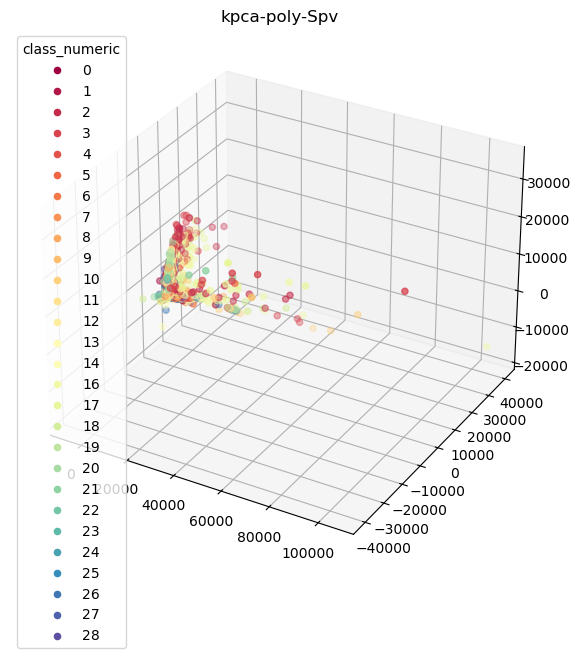

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_31121/472059142.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flatten_video).reset_index(drop=True)


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/w2/kpca/rbf exists. Continuing with execution


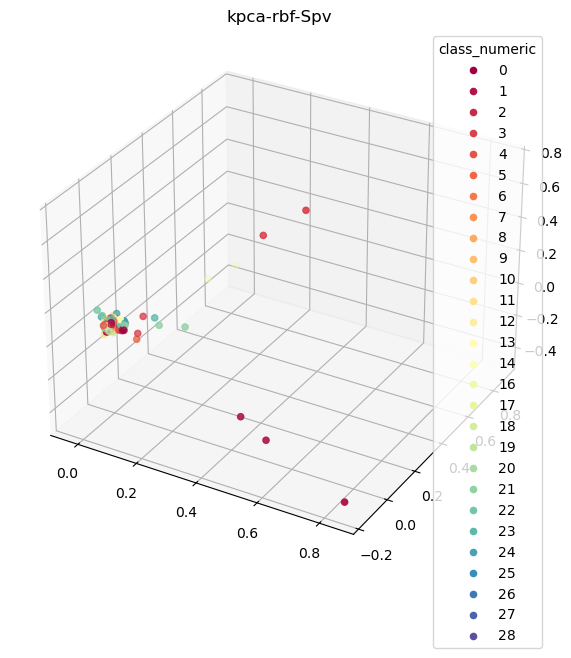

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_31121/472059142.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flatten_video).reset_index(drop=True)


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/w2/kpca/sigmoid exists. Continuing with execution


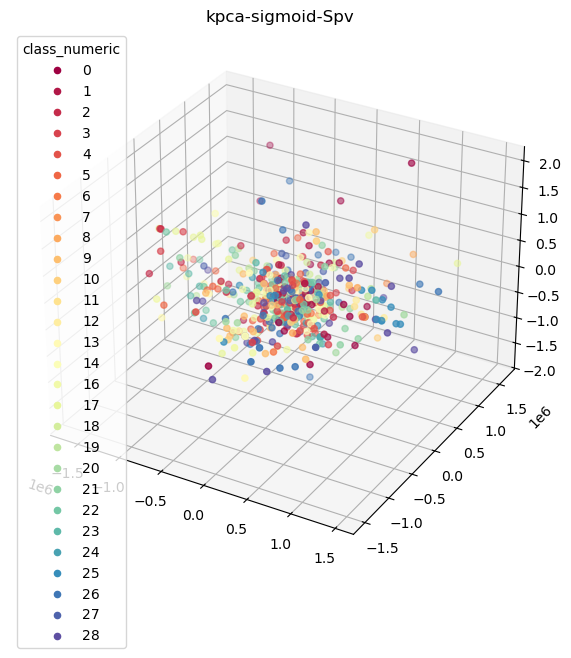

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_31121/472059142.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flatten_video).reset_index(drop=True)


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/w2/kpca/cosine exists. Continuing with execution


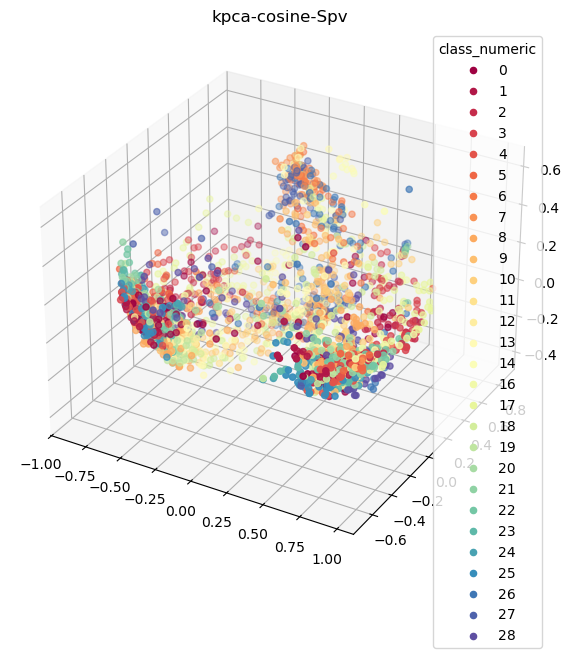

In [23]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  visualize(origin_df=PH3_AH_FRM_KPCA_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_S_PV, label_col=sup.class_numeric_column, reducer_name=sup.PH3_REDUCER_NAME_KPCA, kernel_name=kernel_name)

#### Writeout

In [24]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  writeout(origin_df=PH3_AH_FRM_KPCA_df, data_cols=ah_pf_dataCols, label_cols=sup.class_columns, reducer_name=sup.PH3_REDUCER_NAME_KPCA, kernel_name=kernel_name)

Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/w2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/w2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/w2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/w2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/w2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/w2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/w2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/w2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/w2/kpca/poly exists. Continuing with

## UMAP

In [25]:
PH3_AH_FRM_UMAP_df = PH3_AH_FRM_std_df.copy()

### Active hand detection

#### Exploration

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/w2/umap/ exists. Continuing with execution


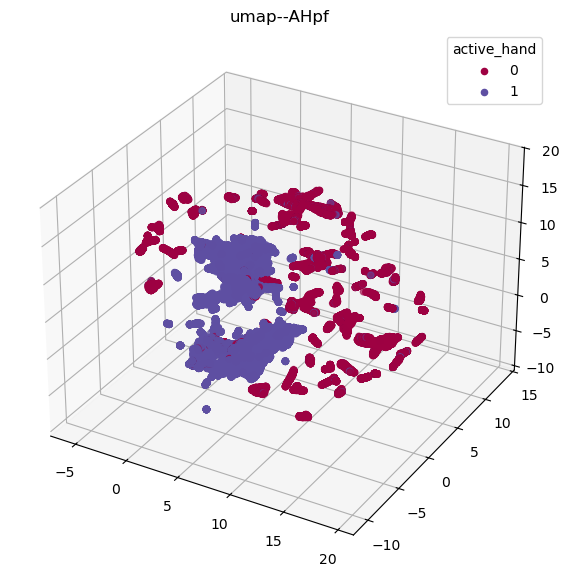

In [26]:
visualize(origin_df=PH3_AH_FRM_UMAP_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_AH_PF, label_col=sup.active_hand_col, reducer_name=sup.PH3_REDUCER_NAME_UMAP, kernel_name='')

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/w2/umap/ exists. Continuing with execution


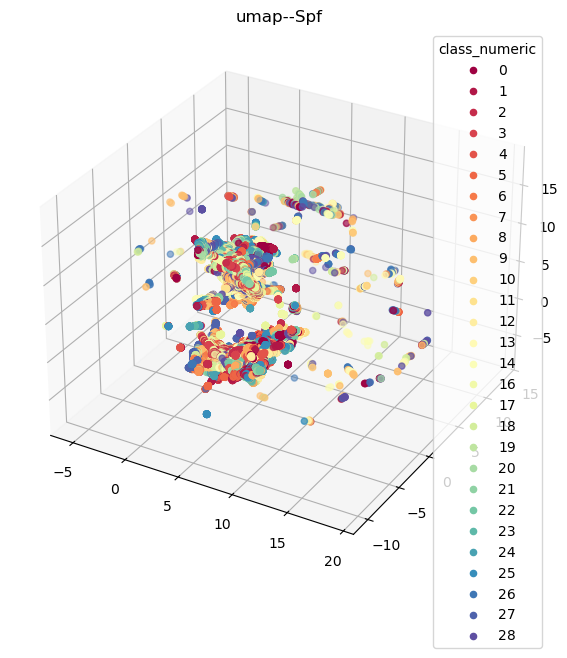

In [27]:
visualize(origin_df=PH3_AH_FRM_UMAP_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_S_PF,label_col=sup.class_numeric_column, reducer_name=sup.PH3_REDUCER_NAME_UMAP, kernel_name='')

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_31121/472059142.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flatten_video).reset_index(drop=True)
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/w2/umap/ exists. Continuing with execution


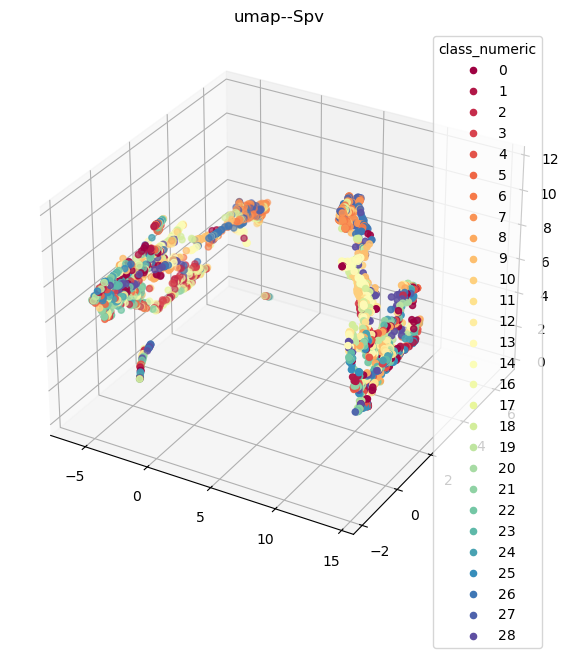

In [28]:
visualize(origin_df=PH3_AH_FRM_UMAP_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_S_PV,label_col=sup.class_numeric_column, reducer_name=sup.PH3_REDUCER_NAME_UMAP, kernel_name='')

#### Writeout

In [29]:
writeout(origin_df=PH3_AH_FRM_UMAP_df, data_cols=ah_pf_dataCols, label_cols=sup.class_columns, reducer_name=sup.PH3_REDUCER_NAME_UMAP, kernel_name='')

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/w2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/w2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/w2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/w2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/w2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/w2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/w2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/w2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/w2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/w2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/w2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/w2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/w2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/w2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/w2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/w2/umap/ exists. Continuing with execution
